<a href="https://colab.research.google.com/github/LeonardoCardoso-mars24/TJD/blob/main/Notebook_KNN_Example_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
import os
import glob
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


1 – Utilizando o Python, leia o ficheiro que descarregou. Dado que o ficheiro contém os dados
na forma CSV sugere-se a utilização da função read_csv da biblioteca Pandas

In [194]:
data_path = Path("/content/abalone.data")

df=pd.read_csv(data_path)
df_processed=pd.read_csv(data_path)

2 – Visualize a dataframe resultante. Deverá notar que os nomes das colunas não estão
corretos. Poderá (e deverá) corrigir este problema inserindo no ficheiro dos dados uma
primeira linha com os nomes das colunas separados por vírgulas. Sugere-se a utilização dos
seguintes nomes:
- Sex
- Length
- Diameter
- Height
- Whole_weight
- Shucked_weight
- Viscera_weight
- Shell_weight
- Rings
Deverá assim obter uma dataframe com estes nomes nas respetivas colunas

In [195]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
df_processed.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


3 – Depois de obter a dataframe com os dados observe a distribuição dos dados pelas 29
classes que são o número de anéis das conchas.
Sugestões:
df['Rings'].value_counts()
df['Rings'].value_counts().sort_index() - para ver ordenado pelo número de rings


In [196]:
df['Rings'].value_counts().sort_index()

,count
Rings,
1,1
2,1
3,15
4,57
5,115
6,259
7,391
8,568
9,689


4 – Como os modelos que vamos desenvolver nesta aula utilizam exclusivamente dados
numéricos, é necessário transformar os valores não numéricos em valores numéricos. Como
poderá verificar, todas as colunas são numéricas exceto a coluna Sex que é uma string. Assim,
transforme os valores desta coluna em 1 se ‘M’ e 0 de ‘F’.
Sugestão: apply(lambda x: 1 if x=='M' else 0)

In [197]:
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0, 'I':0})
df_processed['Sex'] = df_processed['Sex'].replace({'M': 1, 'F': 0, 'I':0})
df_processed['Sex']

,Sex
0,1
1,0
2,1
3,0
4,0
...,...
4171,0
4172,1
4173,1
4174,0


5 – Como terá constatado, a distribuição dos dados por classes não é nada uniforme, existindo
classes com pouquíssimos exemplos. Como é evidente, não é viável trabalhar com classes que
são representadas por tão poucos exemplos como é o caso das classes 1, 2, 3, 21, 22, 23, etc.
Assim, vamos juntar as classes 1, 2, 3, 4 e 5 numa classe única de identificador 5 e as classes
20 a 29 numa classe de identificador 20.
Para que as classes fiquem com uma numeração “simpática” vamos ainda renumerar todas
elas entre 1 e 16 subtraindo 4 ao valor da classe original.

Sugestão: usar apply de uma função que faça a transformação do valor da classe.

In [198]:
df['Rings'] = df['Rings'].apply(lambda x: 1 if x <= 5 else x)
df['Rings'] = df['Rings'].apply(lambda x: x-4 if x >= 5 else x)
df['Rings'] = df['Rings'].apply(lambda x: 16 if x >= 16 else x)
df['Rings'].value_counts().sort_index()


,count
Rings,
1,189
2,259
3,391
4,568
5,689
6,634
7,487
8,267
9,203


6 – Depois de criado este conjunto de dados é necessário dividir os dados em Predictors
(dados que servem para predizer a classe) e Class (coluna que indica a classe de cada
exemplo).
Os dados de treino podem ser os dados originais fazendo drop à coluna da classe (Rings) e os
dados da classe são simplesmente a coluna Rings

In [199]:
train_df = df.drop('Rings', axis=1, inplace=False)
class_df = df['Rings']
train_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
3,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
4,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4172,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4173,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [200]:
class_df

,Rings
0,3
1,5
2,6
3,3
4,4
...,...
4171,7
4172,6
4173,5
4174,6


In [201]:
df_processed['Rings'].unique()

array([ 7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 15, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

7 – Depois de separados em dois conjuntos há que dividir os dados em conjunto de treino e
conjunto de teste. O código abaixo permite fazer essa divisão criando um conjunto de treino
com 75% dos dados e um conjunto de teste com os restantes 25% onde X são os dados e Y a
classe correspondente.

In [202]:
X_train,X_test,y_train,y_test=train_test_split(train_df,class_df, train_size=0.75, random_state=0)

8 – Está então na altura de se testar o primeiro classificador K-NN (K nearest neighbor).
Podemos obter este classificador com o código:
PS
Perceção Sensorial
knn=KNeighborsClassifier(n_neighbors=5) # KNN com K=5
knn.fit(X_train,y_train) # train the classifier
knn.score(X_test,y_test) # test the result
Nota: se quiser visualizar a configuração do classificar KNN basta visualizar a variável knn

In [203]:
df['Sex'].unique()


array([1, 0])

In [204]:
knn=KNeighborsClassifier(n_neighbors=5, weights='distance') # KNN com K=5
knn.fit(X_train,y_train) # train the classifier
knn.score(X_test,y_test) # test the result

0.24808429118773948

9 – Como poderá constatar, a precisão do classificado é muito baixa (na ordem dos 24%).
Esta baixa precisão deve-se ao elevado número de classes que foram consideradas (16). Como
se pode constatar ma literatura deste exemplo, os resultados obtidos por diversos estudos
são na ordem dos 65% mas utilizando apenas três classes: 1..8, 9..10, 11..29. Vamos então
refazer o reordenamento das classes para estas três classes que numeraremos de 1 a 3

In [205]:
df_processed['Rings'].unique()

array([ 7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 15, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [206]:
df_processed['Rings'] = df_processed['Rings'].apply(lambda x: 1 if x <= 8 else x)
df_processed['Rings'] = df_processed['Rings'].apply(lambda x: 2 if (x >= 9 and x <= 10) else x)
df_processed['Rings'] = df_processed['Rings'].apply(lambda x: 3 if x >= 10 else x)
#df_processed['Rings']
df_processed['Rings'].unique()

array([1, 2, 3])

In [207]:
df_processed

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
3,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
4,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,1
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,3
4172,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4173,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2


11 – Com os dados reorganizados em três classes refaça o classificador e veja qual a precisão
obtida com o conjunto de teste e com o conjunto de treino (deverá ser na ordem dos 63%)

In [208]:
train_df_proc = df_processed.drop('Rings', axis=1, inplace=False)
class_df_proc = df_processed['Rings']
X_train_proc,X_test_proc,y_train_proc,y_test_proc=train_test_split(train_df_proc,class_df_proc, train_size=0.75, random_state=0)

knn_proc=KNeighborsClassifier(n_neighbors=5, weights='distance') # KNN com K=5
knn_proc.fit(X_train_proc,y_train_proc) # train the classifier
knn_proc.score(X_test_proc,y_test_proc) # test the result

0.6312260536398467

12 – Classifique individualmente os cinco primeiros exemplos do conjunto de teste (com k=5)
verificando quais os exemplos mais próximos de cada um dos valores classificados, qual o
valor das distâncias e quais as classes desses exemplos justificando a classe atribuída.
Sugestões:
- para classificar um exemplo: knn.predict([X_test.iloc[ex].tolist()])[0])
- para obter os vizinhos mais próximos:
neigs=knn.kneighbors(X_test.iloc[ex].values.reshape(1, -1), n_neighbors=5)

In [209]:
from sklearn.neighbors import KNeighborsClassifier

# Para classificar e obter os vizinhos mais próximos
for ex in range(5):
    # Obter a classificação do exemplo
    classificacao = knn_proc.predict(X_test_proc.iloc[ex:ex+1])  # Mantém o DataFrame para previsão
    classificacao = classificacao[0]

    # Obter os 5 vizinhos mais próximos
    distancias, indices_vizinhos = knn_proc.kneighbors(X_test_proc.iloc[ex:ex+1], n_neighbors=5)

    # Obter as classes dos vizinhos mais próximos
    classes_vizinhos = y_train_proc.iloc[indices_vizinhos[0]].tolist()

    # Formatando as distâncias para 4 casas decimais
    distancias_formatadas = [f"{dist:.4f}" for dist in distancias[0]]

    # Mostrar os resultados no formato solicitado
    print(f"Exemplo {ex+1} foi classificado como: {classificacao}")
    print(f"Classes dos 5 neighbors mais próximos: {classes_vizinhos}")
    print(f"Distâncias dos 5 neighbors mais próximos: {distancias_formatadas}")
    print(f"Índices dos 5 exemplos mais próximos no dataframe: {indices_vizinhos[0].tolist()}")
    print("-" * 50)


Exemplo 1 foi classificado como: 3
Classes dos 5 neighbors mais próximos: [3, 2, 1, 1, 3]
Distâncias dos 5 neighbors mais próximos: ['0.0163', '0.0278', '0.0334', '0.0358', '0.0388']
Índices dos 5 exemplos mais próximos no dataframe: [787, 1901, 567, 391, 36]
--------------------------------------------------
Exemplo 2 foi classificado como: 2
Classes dos 5 neighbors mais próximos: [1, 2, 2, 2, 1]
Distâncias dos 5 neighbors mais próximos: ['0.0275', '0.0328', '0.0395', '0.0403', '0.0448']
Índices dos 5 exemplos mais próximos no dataframe: [1766, 503, 1781, 2694, 2106]
--------------------------------------------------
Exemplo 3 foi classificado como: 1
Classes dos 5 neighbors mais próximos: [1, 1, 1, 1, 1]
Distâncias dos 5 neighbors mais próximos: ['0.0240', '0.0257', '0.0267', '0.0280', '0.0288']
Índices dos 5 exemplos mais próximos no dataframe: [686, 226, 2874, 650, 1556]
--------------------------------------------------
Exemplo 4 foi classificado como: 2
Classes dos 5 neighbors ma

13 – Construa a matriz de confusão para o classificador anterior.
Sugestão: utilize a função confusion_matrix da biblioteca sklearn.metrics

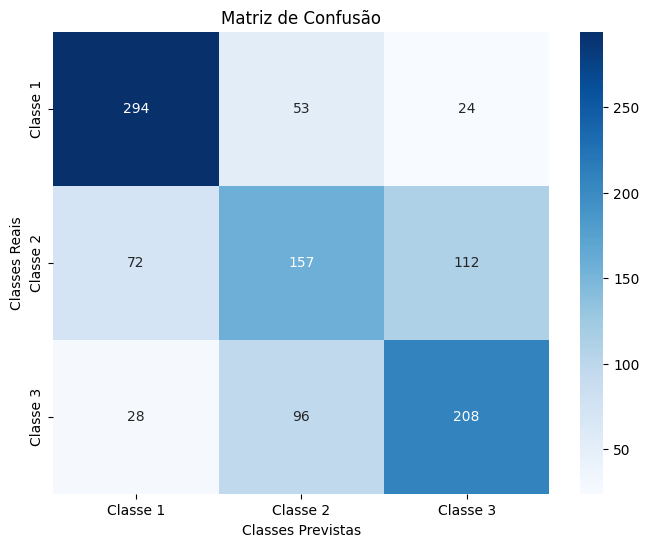

In [210]:
# Fazer previsões no conjunto de teste
y_pred_proc = knn_proc.predict(X_test_proc)

# Construir a matriz de confusão
matriz_confusao = confusion_matrix(y_test_proc, y_pred_proc)

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3'])
plt.title('Matriz de Confusão')
plt.xlabel('Classes Previstas')
plt.ylabel('Classes Reais')
plt.show()

14 – Repita o classificador anterior com K=1. Justifique a precisão obtida com o conjunto de
treino e com o conjunto de teste.

In [211]:
# Criar o classificador KNN com K=1
knn_k1 = KNeighborsClassifier(n_neighbors=1)

# Treinar o classificador com os dados de treino processados
knn_k1.fit(X_train_proc, y_train_proc)

# Fazer previsões com o conjunto de treino
y_train_pred_k1 = knn_k1.predict(X_train_proc)

# Fazer previsões com o conjunto de teste
y_test_pred_k1 = knn_k1.predict(X_test_proc)

# Calcular a precisão para o conjunto de treino
precision_train_k1 = accuracy_score(y_train_proc, y_train_pred_k1)

# Calcular a precisão para o conjunto de teste
precision_test_k1 = accuracy_score(y_test_proc, y_test_pred_k1)

# Exibir os resultados
print(f'Precisão no conjunto de treino com K=1: {precision_train_k1:.4f}')
print(f'Precisão no conjunto de teste com K=1: {precision_test_k1:.4f}')

Precisão no conjunto de treino com K=1: 1.0000
Precisão no conjunto de teste com K=1: 0.5939


O modelo foi treinado sobre o set de treino. Portanto, ao ser avaliado sobre este conjunto de dados irá ter sempre 100% de accuracy ao ter K=1, pois o exemplo mais parecido que irá encontrar no set de treino será o próprio input. Ou seja, a classificação do modelo KNN de um argumento que esteve presente no treino do mesmo irá dar sempre certo, pois irá apenas consultar o set de treino e obter a classe do argumento.

Já no set de teste isso não acontece. Isto é, os argumentos que o modelo recebe serão dados que nunca viu no set de treino. Por esse motivo, a performance do modelo baixa. Isso ocorre porque, enquanto o modelo pode ter aprendido a classificar os dados de treino perfeitamente, ele pode não generalizar bem para novos dados.

A precisão no set de teste pode variar dependendo da distribuição dos dados. Se houver muitos exemplos de teste que são muito próximos de exemplos de treino, a precisão pode ser alta; caso contrário, a precisão pode ser baixa.

15 – Analise a precisão obtida com o conjunto de treino e com o conjunto de teste variando
o K entre 1 e 15 (só valores impares, claro). Se possível faça um gráfico com os valores de
precisão para ambas as situações em função de K.

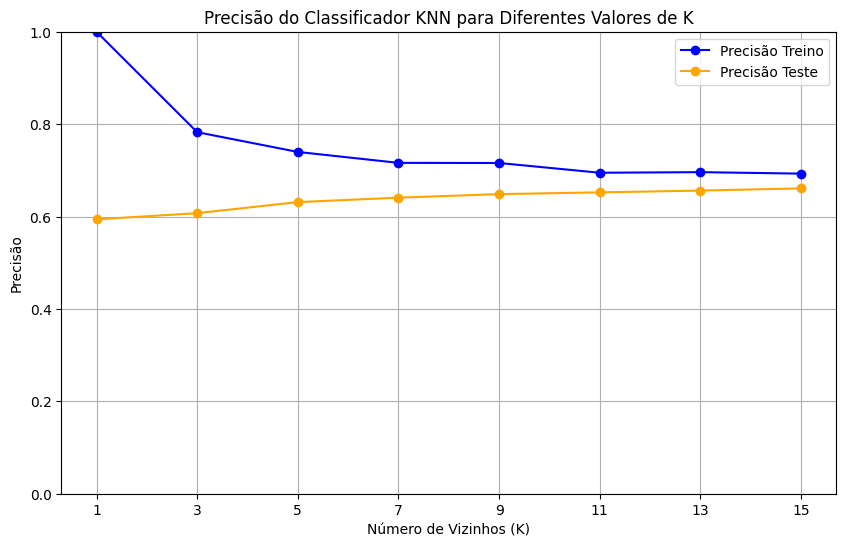

In [212]:
# Listas para armazenar as precisões
train_accuracies = []
test_accuracies = []

# Variar K entre 1 e 15 (só valores ímpares)
for k in range(1, 16, 2):
    # Criar o classificador KNN com o valor atual de K
    knn = KNeighborsClassifier(n_neighbors=k)

    # Treinar o classificador com os dados de treino processados
    knn.fit(X_train_proc, y_train_proc)

    # Fazer previsões com o conjunto de treino
    y_train_pred = knn.predict(X_train_proc)

    # Fazer previsões com o conjunto de teste
    y_test_pred = knn.predict(X_test_proc)

    # Calcular a precisão para o conjunto de treino
    precision_train = accuracy_score(y_train_proc, y_train_pred)

    # Calcular a precisão para o conjunto de teste
    precision_test = accuracy_score(y_test_proc, y_test_pred)

    # Adicionar as precisões às listas
    train_accuracies.append(precision_train)
    test_accuracies.append(precision_test)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16, 2), train_accuracies, marker='o', label='Precisão Treino', color='blue')
plt.plot(range(1, 16, 2), test_accuracies, marker='o', label='Precisão Teste', color='orange')
plt.title('Precisão do Classificador KNN para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Precisão')
plt.xticks(range(1, 16, 2))
plt.ylim(0, 1)  # Define o limite do eixo y de 0 a 1
plt.grid()
plt.legend()
plt.show()
